In [15]:
import numpy as np
from gridData import Grid
import matplotlib.pyplot as plt
from aquapointer.density_canvas.DensityCanvas import DensityCanvas
from aquapointer.slicing import density_file_to_grid, density_slices_by_plane_and_offsets, density_slices_by_planes, density_origin, density_point_boundaries

## Preliminary stuff (auxiliary functions, loading density, etc)

In [16]:
main_folder = "../data"
dna_folder = f"{main_folder}/DNA"
rna_folder = f"{main_folder}/RNA"
wvv_folder = f"{main_folder}/4wvv"

def rism_file(path):
    return f"{path}/prot_3drism.O.1.dx"

def water_file(path, i=1):
    return f"{path}/wt_network{i}.pdb"

In [17]:
# load density
rism = Grid(rism_file(dna_folder)) 

# load first water network
lines = []
with open(water_file(dna_folder, 1,), 'r') as file_in:
    for line in file_in:
        lines.append(line)
waters = []
for j in range(2, len(lines)):
    ls = lines[j].split()
    coords = np.array([float(ls[6]), float(ls[7]), float(ls[8])])
    waters.append(coords)
waters = np.array(waters)

In [18]:
# print coordinates of water molecules
waters

array([[35.461,  7.656, 29.512],
       [33.41 ,  8.708, 30.487],
       [31.278, 10.605, 32.736]])

## slice along z axis

In [19]:
slicing_planes = []
zs = [] #save z coordinate of the slice
for i in range(1, rism.grid.shape[1]):
    
    # calculate z coordinate
    z = rism.midpoints[2][i-1] 
    
    # take only slices within a certain z range
    if z<26 or z>34:
        continue
    
    # rism.midpoints[axis (x=0, y=1, z=2)][lattice site along axis]
    slicing_planes.append(
        np.array([
            np.array([rism.midpoints[0][0], rism.midpoints[1][0], rism.midpoints[2][i]]),
            np.array([rism.midpoints[0][1], rism.midpoints[1][0], rism.midpoints[2][i]]),
            np.array([rism.midpoints[0][0], rism.midpoints[1][1], rism.midpoints[2][i]]),
        ])
    )
    zs.append(z)
canvases = density_slices_by_planes(rism, slicing_planes)


In [20]:
# crop canvases
for c, canvas in enumerate(canvases):
    canvas.crop_canvas((33.5, 9), (10, 10))

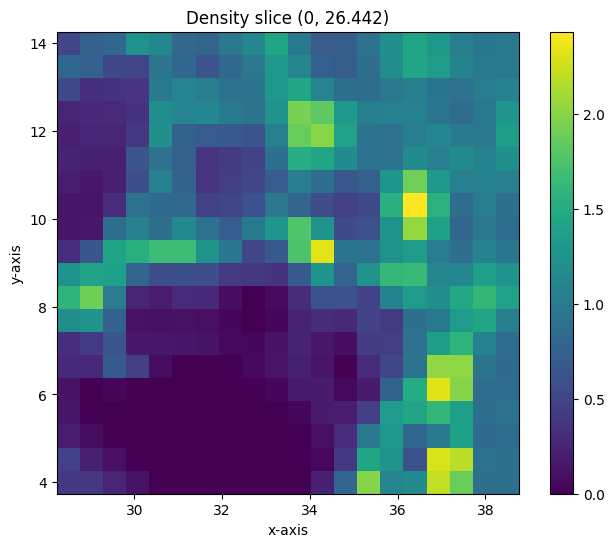

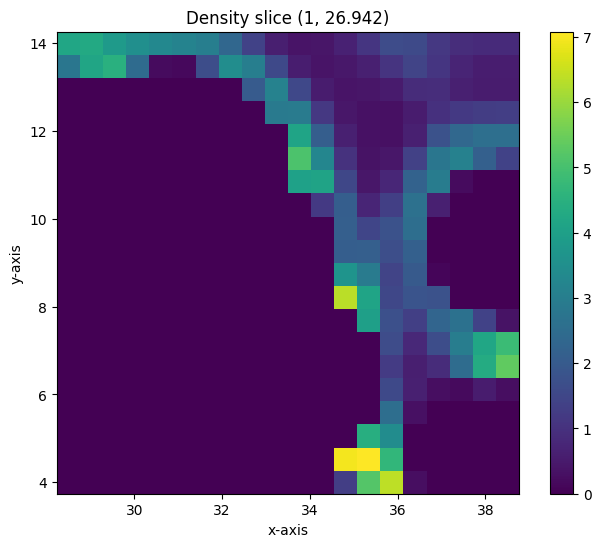

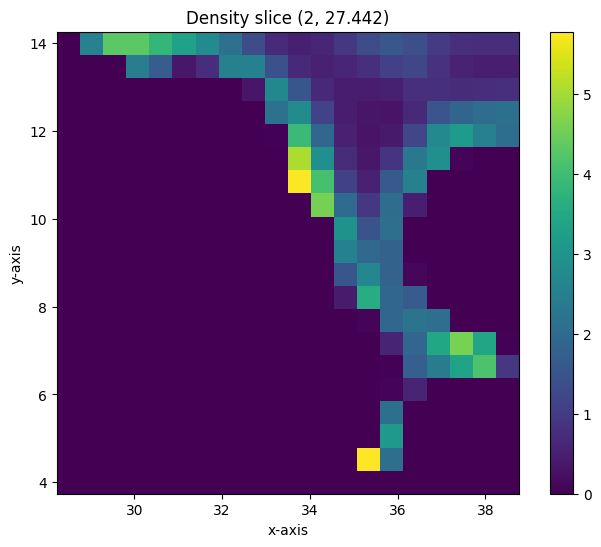

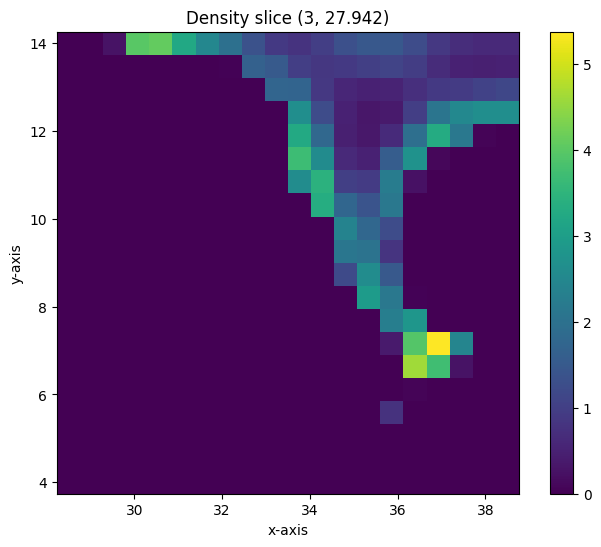

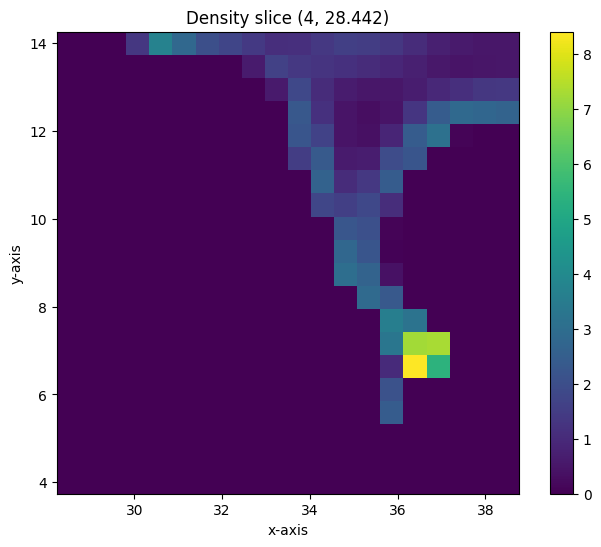

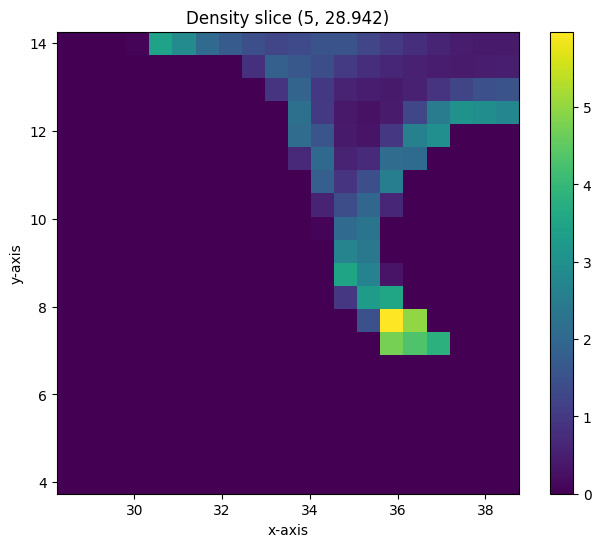

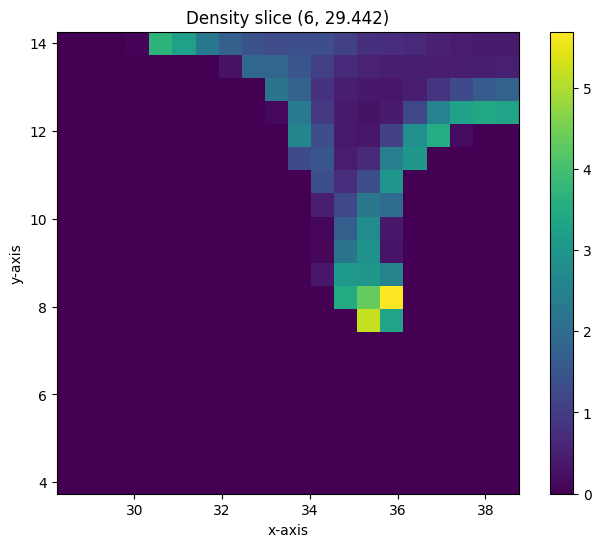

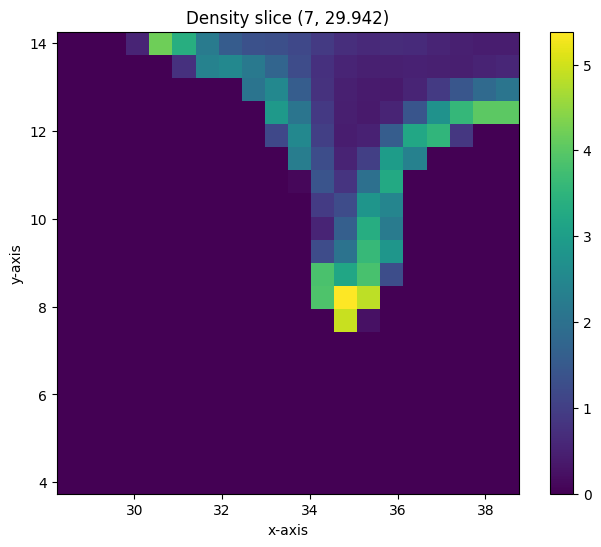

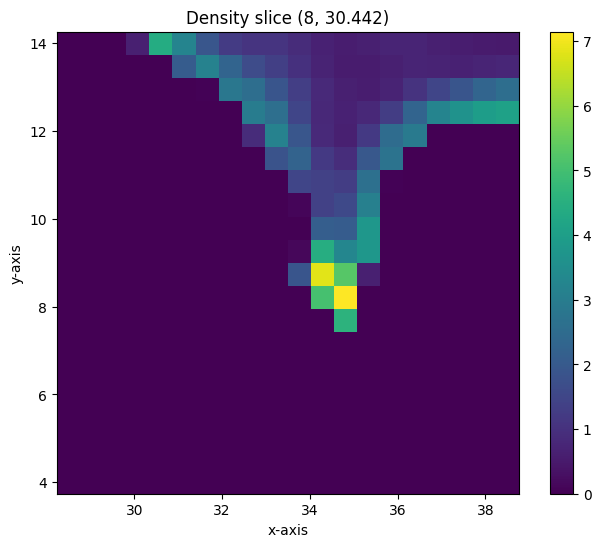

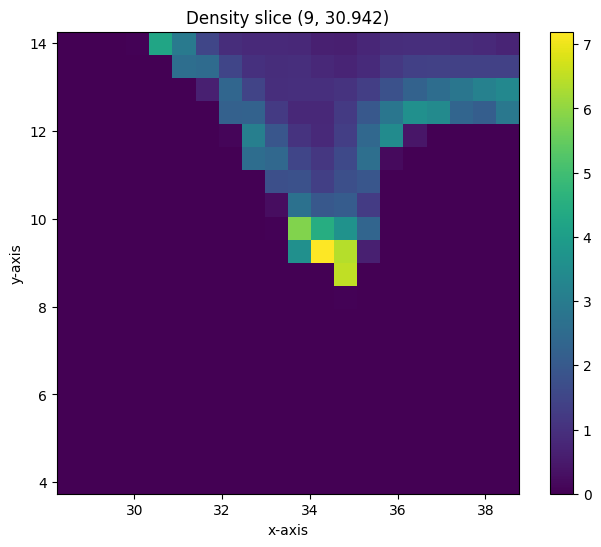

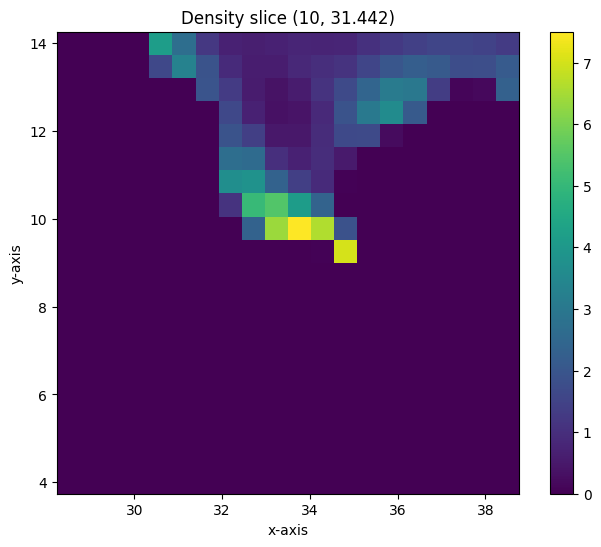

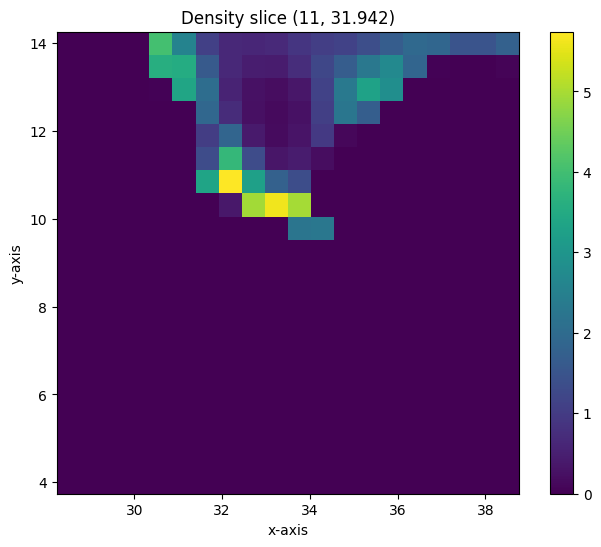

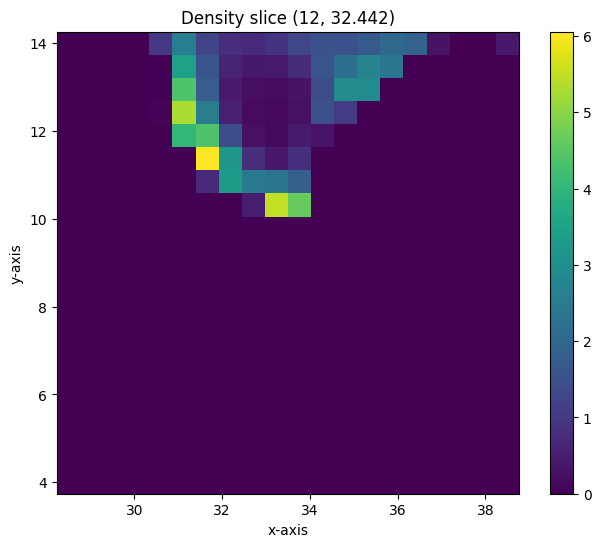

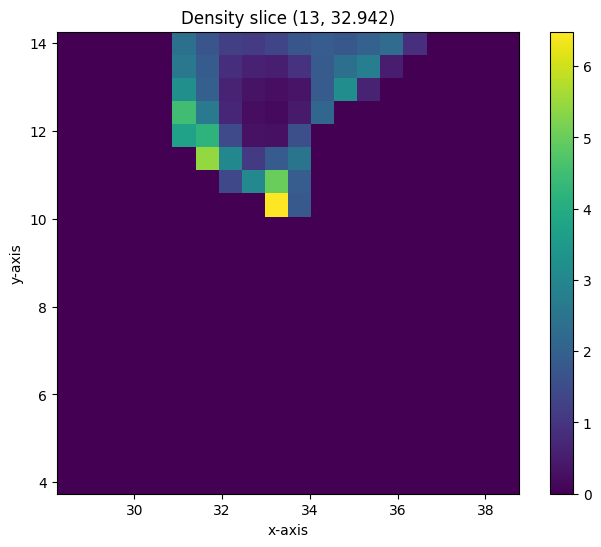

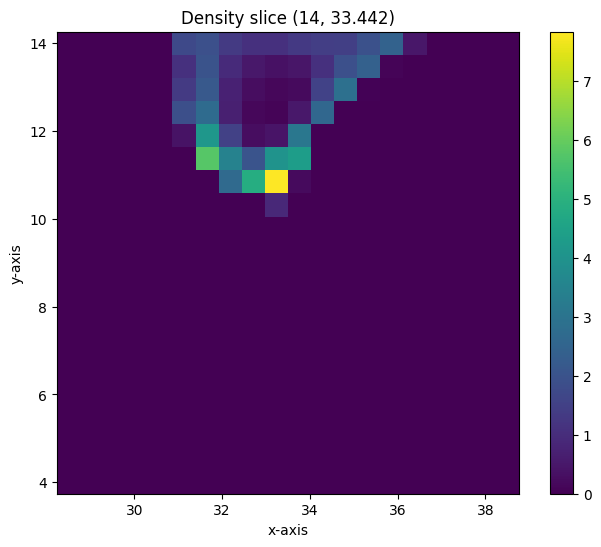

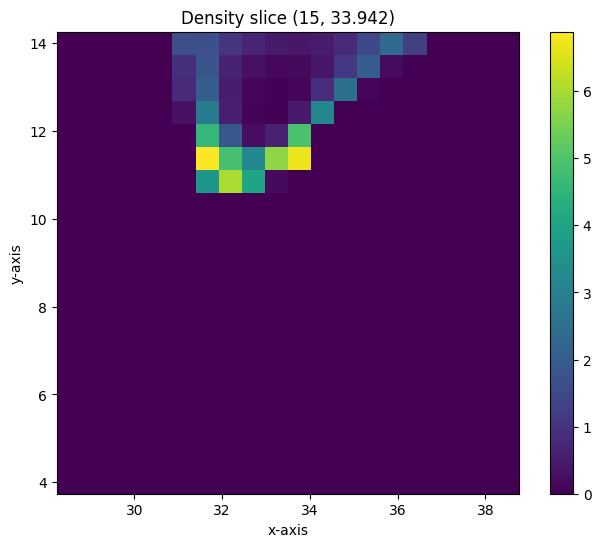

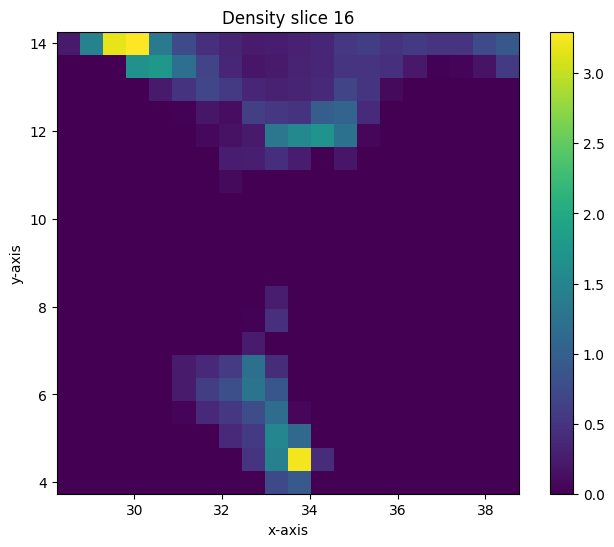

In [21]:
# plot canvases
for c, canvas in enumerate(canvases):
    try:
        title = f"Density slice {c, zs[c]}"
    except IndexError:
        title = f"Density slice {c}" 
    canvas.draw(title=title, figsize=(8,6))

## slice along y axis: error happening

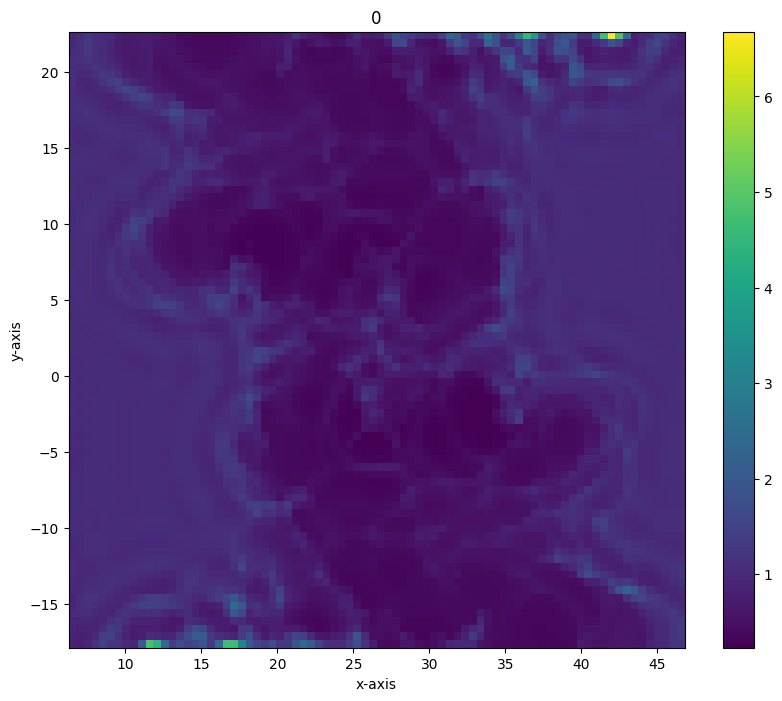

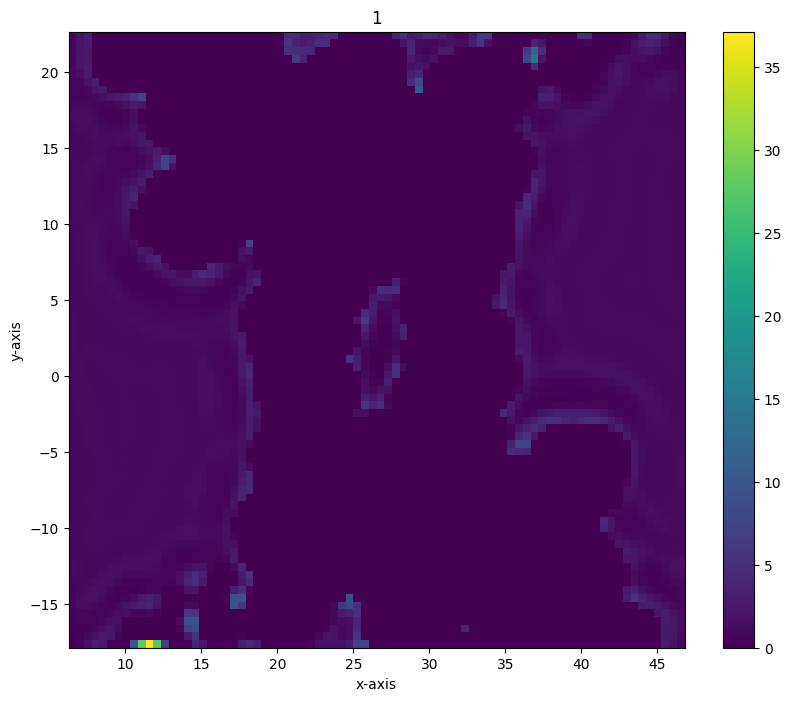

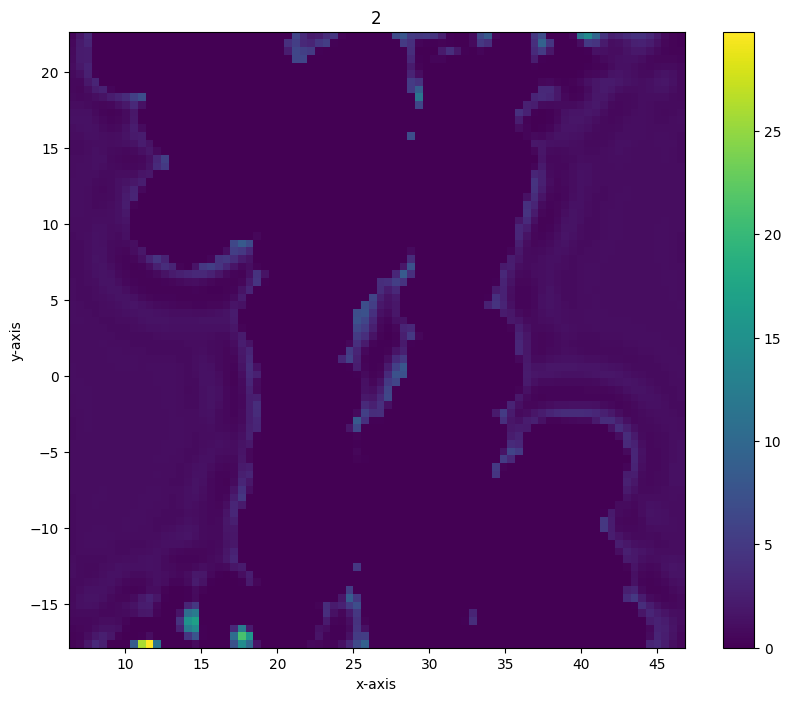

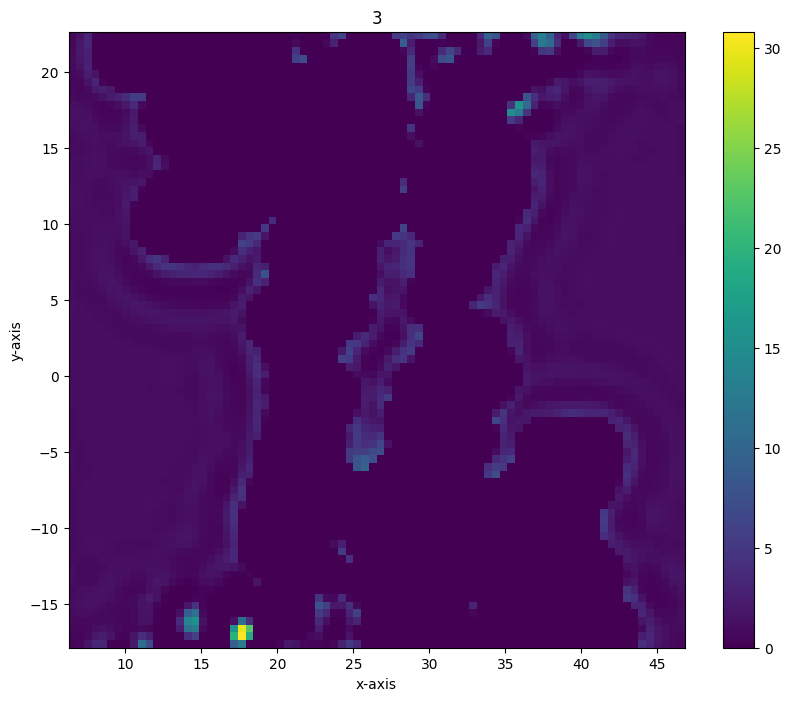

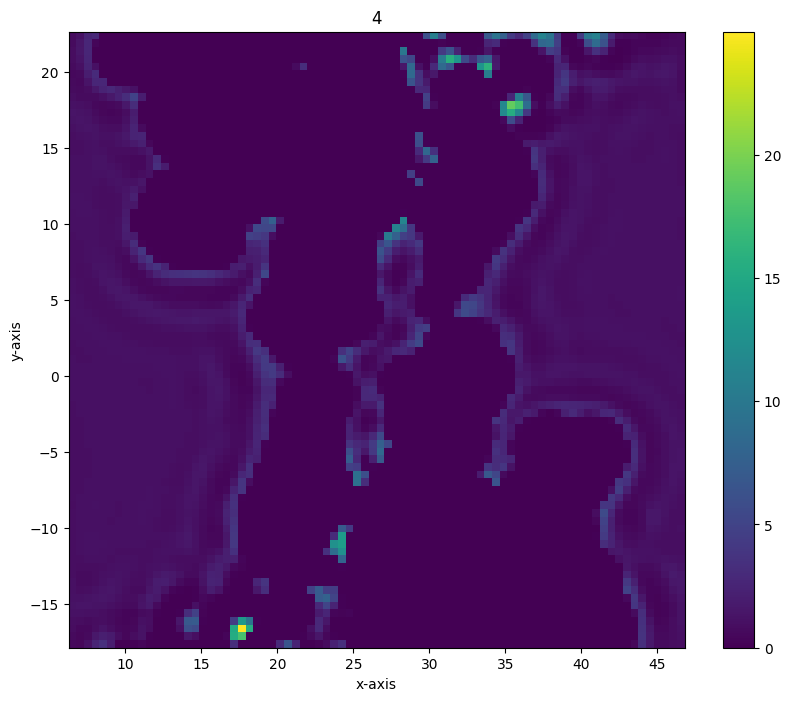

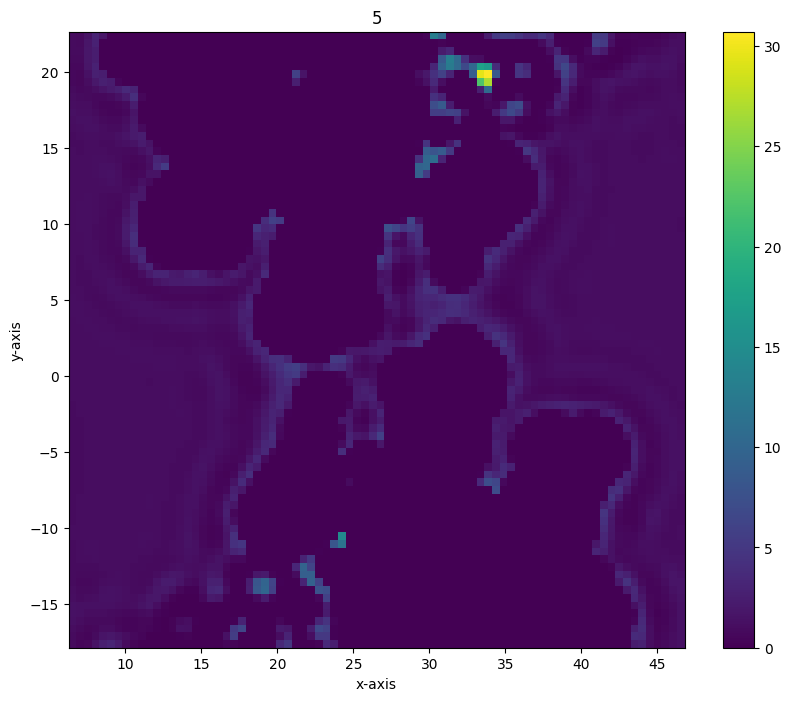

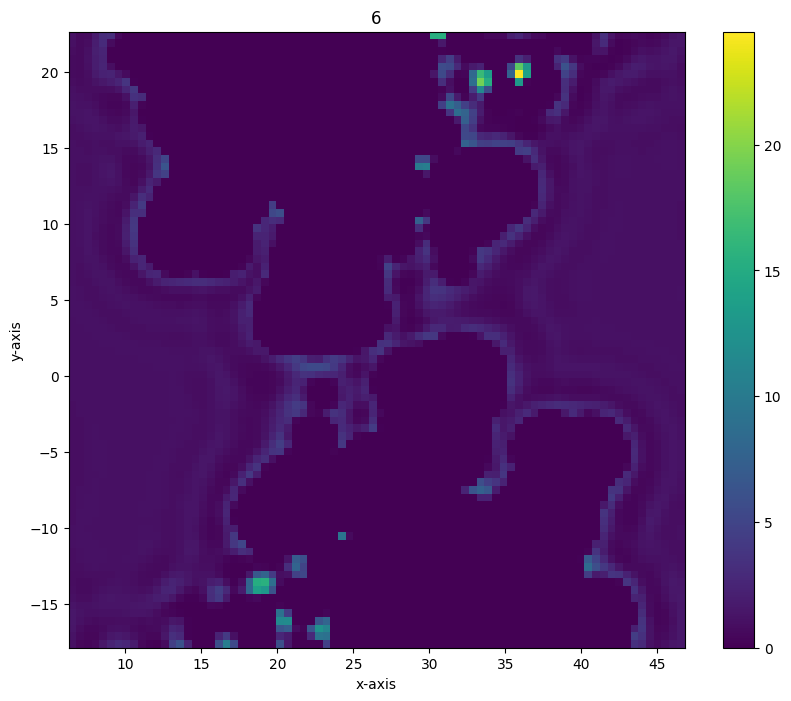

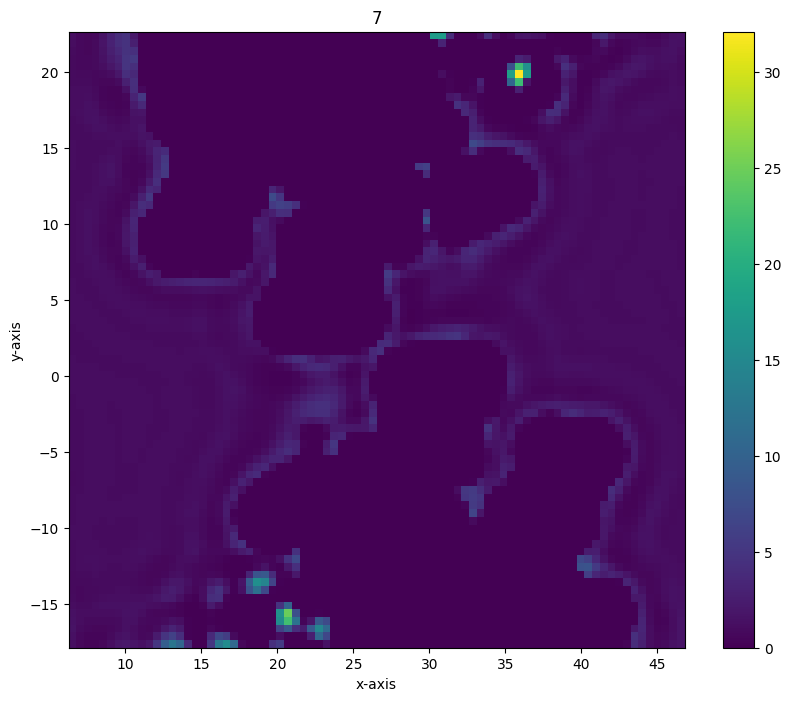

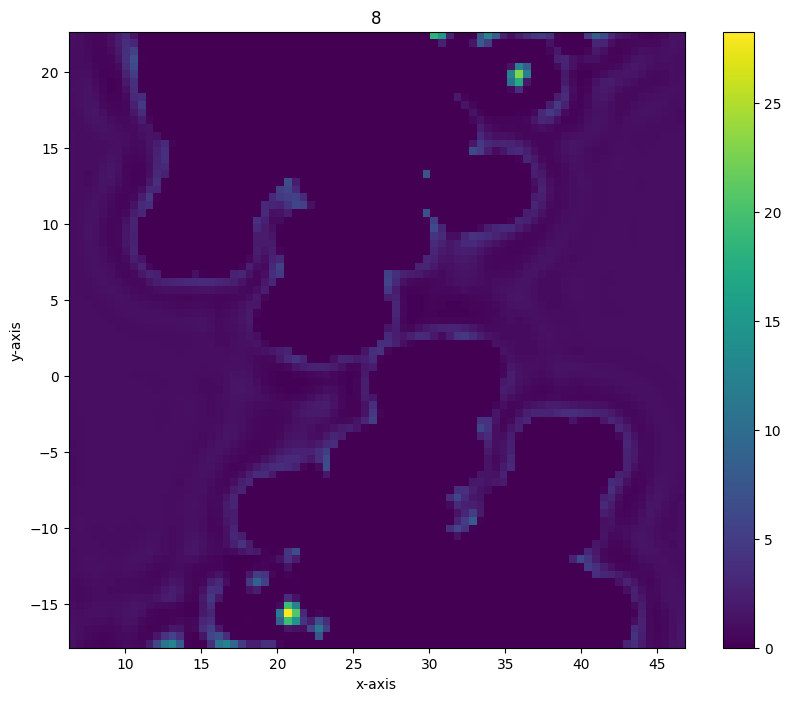

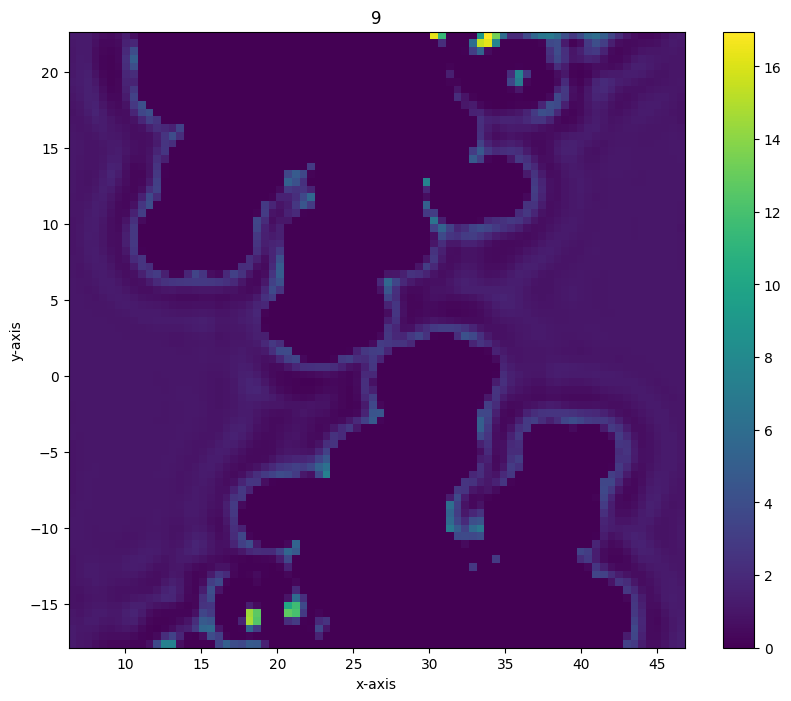

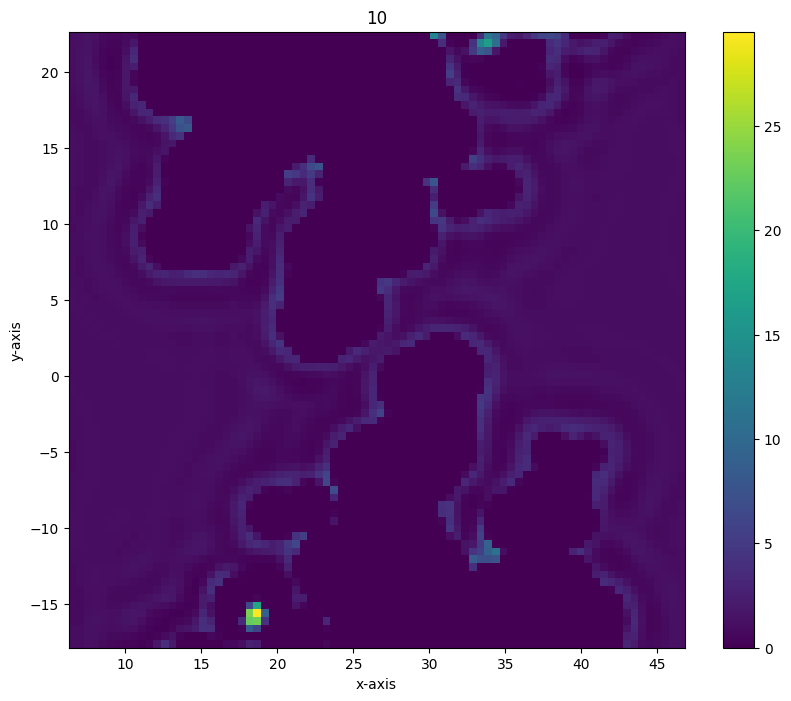

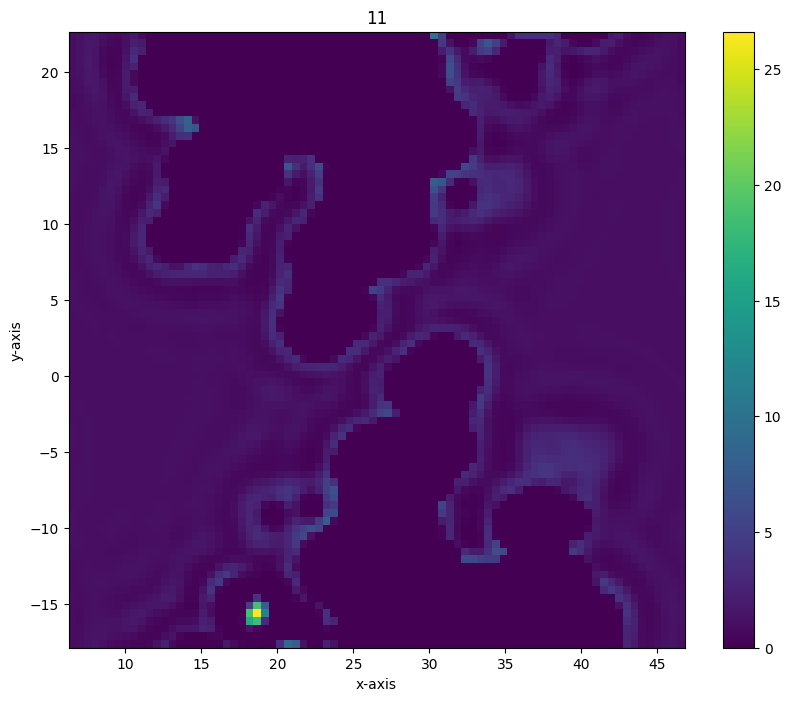

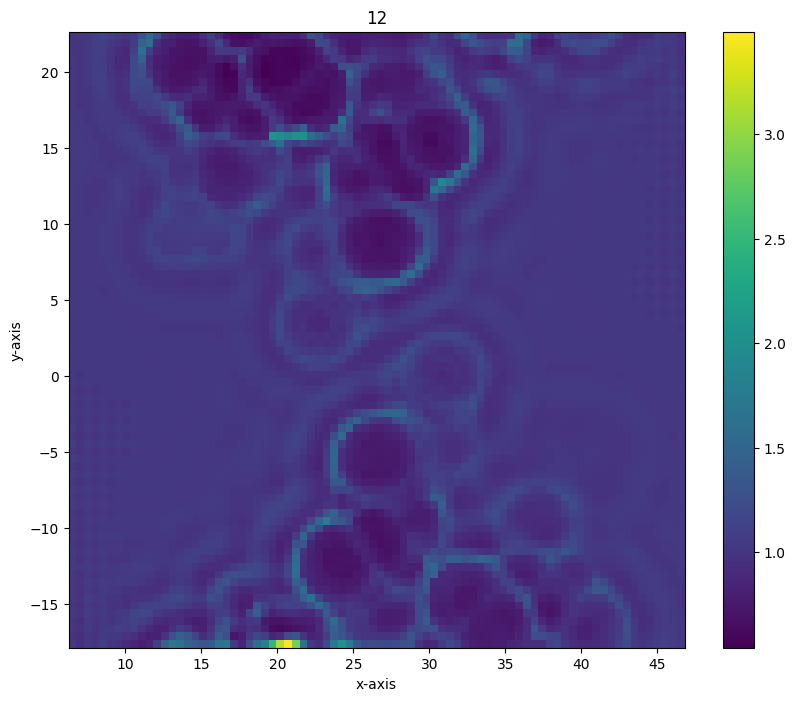

In [27]:
slicing_planes = []
ys = []
for i in range(1, rism.grid.shape[1]):
    y = rism.midpoints[1][i-1] 
    if y<6 or y>12:
        continue
    slicing_planes.append(
        np.array([
            np.array([rism.midpoints[0][0], rism.midpoints[1][i], rism.midpoints[2][0]]),
            np.array([rism.midpoints[0][1], rism.midpoints[1][i], rism.midpoints[2][0]]),
            np.array([rism.midpoints[0][0], rism.midpoints[1][i], rism.midpoints[2][1]]),
        ])
    )
    ys.append(y)
canvases = density_slices_by_planes(rism, slicing_planes)

for c, canvas in enumerate(canvases):
    canvas.draw(title=str(c))

## slice along skewed plane (empty slices error)

In [23]:
rism = Grid(rism_file(dna_folder)) 

In [24]:
# find normal to plane defined by the three water molecules
AB = waters[1]-waters[0]
AC = waters[2]-waters[0]
N = np.cross(AB, AC)
N /= np.linalg.norm(N)

print(N)

[ 0.16839265  0.82635385 -0.53738555]


In [25]:
# define slicing planes by offsetting the water molecule coordinates by a certain
# amount `t` along the normal `N`

offset = (-5, 5)
t_values = np.linspace(offset[0], offset[1], (offset[1]-offset[0])+1)
print(t_values)

slicing_planes = []
for t in t_values:
    slicing_planes.append(
        waters + t*N
    )

canvases = density_slices_by_planes(rism, slicing_planes)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


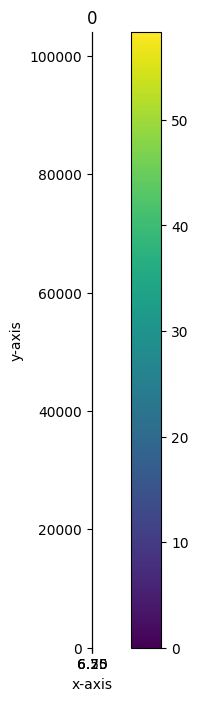

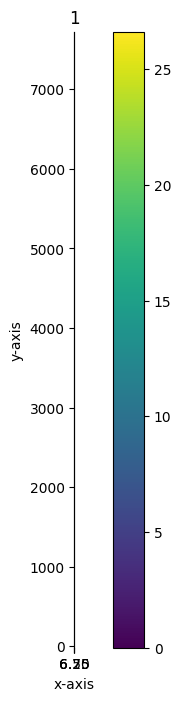

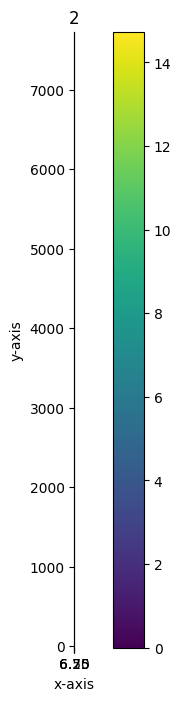

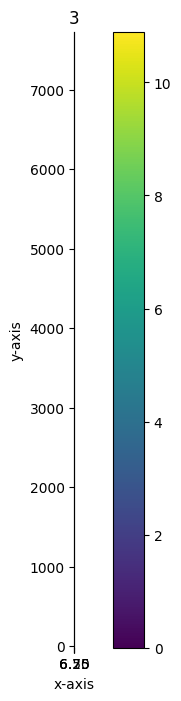

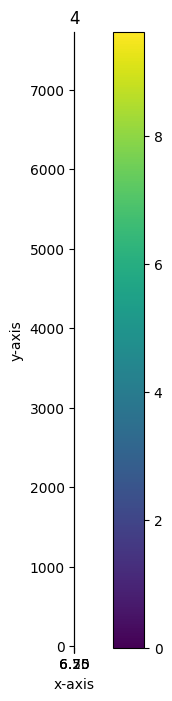

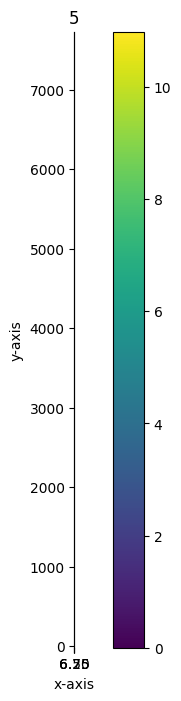

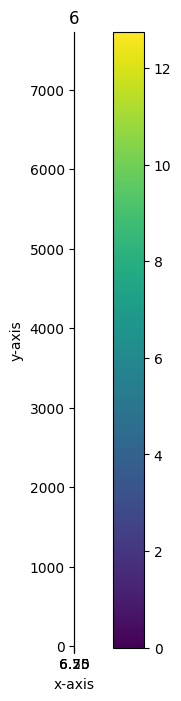

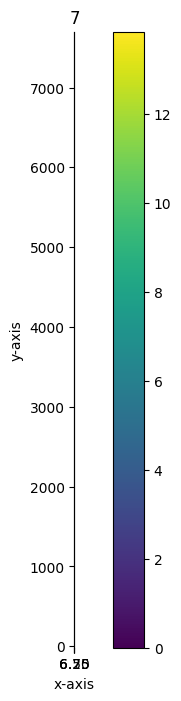

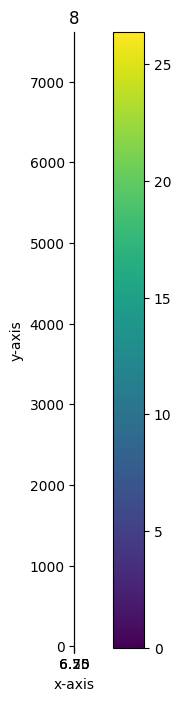

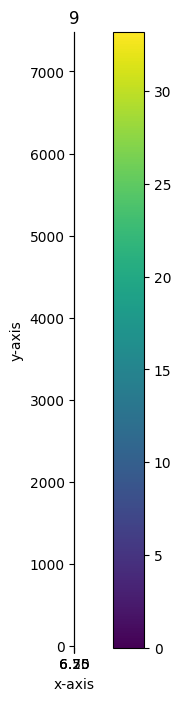

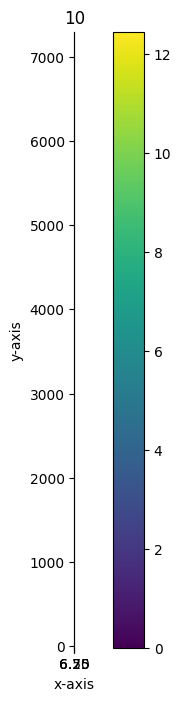

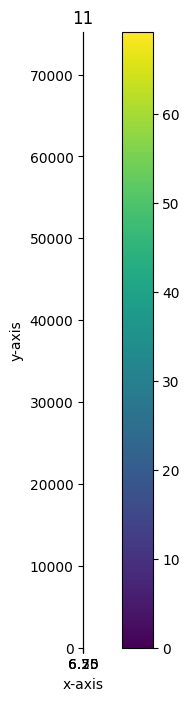

In [26]:
for c, canvas in enumerate(canvases):
    canvas.draw(title=str(c))